# seaborn做图学习

1. 相关矩阵图

ns.pairplot((data, hue=None, hue_order=None,   palette=None, vars=None, 
x_vars=None,    y_vars=None,    kind='scatter',    diag_kind='auto',    markers=None,    height=2.5,    aspect=1,    dropna=True,    plot_kws=None,    diag_kws=None,    grid_kws=None,    size=None,
)
```python
sns.pairplot( iris_data, hue='class',
                          palette=color );
```


本部分内容参考：https://cloud.tencent.com/developer/article/1525916
在 Matplotlib 那贴已提过，个人偏好百度 Echarts 里面的一组颜色，因此将其 hex 颜色代码定义出来，其中红色的 r_hex 和深青色的 dt_hex 是大爱。
```python
r_hex = '#dc2624'     # red,       RGB = 220,38,36
dt_hex = '#2b4750'    # dark teal, RGB = 43,71,80
tl_hex = '#45a0a2'    # teal,      RGB = 69,160,162
r1_hex = '#e87a59'    # red,       RGB = 232,122,89
tl1_hex = '#7dcaa9'   # teal,      RGB = 125,202,169
g_hex = '#649E7D'     # green,     RGB = 100,158,125
o_hex = '#dc8018'     # orange,    RGB = 220,128,24
tn_hex = '#C89F91'    # tan,       RGB = 200,159,145
g50_hex = '#6c6d6c'   # grey-50,   RGB = 108,109,108
bg_hex = '#4f6268'    # blue grey, RGB = 79,98,104
g25_hex = '#c7cccf'   # grey-25,   RGB = 199,204,207
```
用 set_style() 选五种风格：darkgrid, whitegrid, dark, white 和 ticks .
用 set_palette() 六种调色盘：deep, muted, pastel, bright, dark 和 colorblind
**调色盘**
![调色盘](https://ask.qcloudimg.com/http-save/6430377/jsttyc8sgj.jpeg?imageView2/2/w/1620)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


In [4]:
## 指定随机数生成时所用算法开始的整数值，仅第一次有效
np.random.seed(1031)

In [19]:
# 定义调色板
color = ['#dc2624', '#2b4750', '#45a0a2', '#e87a59',
         '#7dcaa9', '#649E7D', '#dc8018', '#C89F91',          
         '#6c6d6c', '#4f6268', '#c7cccf']
sns.set_palette( color )

In [5]:
#读入数据,第二个参数用来把 csv 里面空白处用 NaN 代替
iris_data = pd.read_csv( r'D:\ProgramData\GitHubProject\DataSets\iris.data', 
                          na_values=['NA'] )

In [6]:
iris_data.head(10)

,sepal_lenth_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [8]:
iris_data.describe()

,sepal_lenth_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


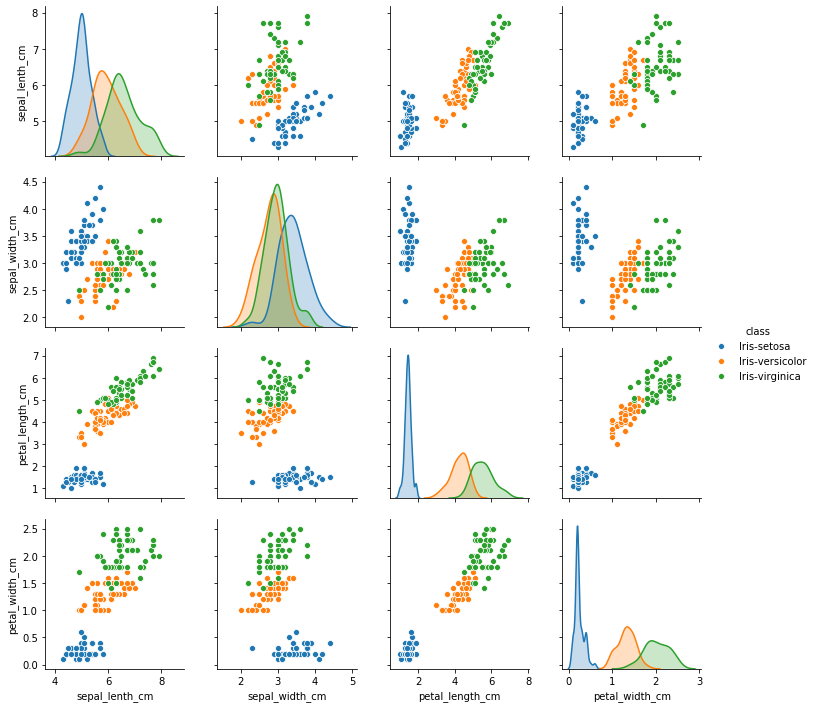

In [10]:
sns.pairplot(iris_data.dropna(), hue='class');

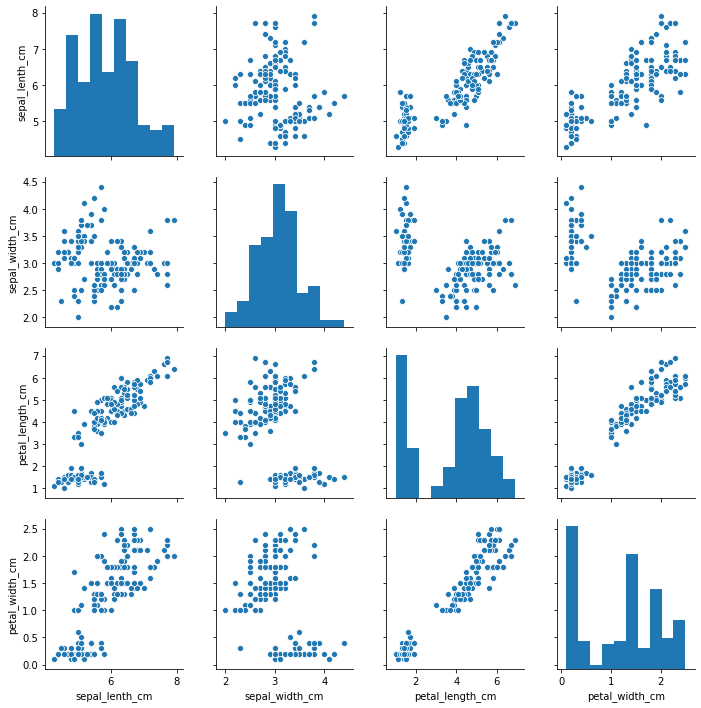

In [15]:
# 无色彩区分
sns.pairplot(iris_data);

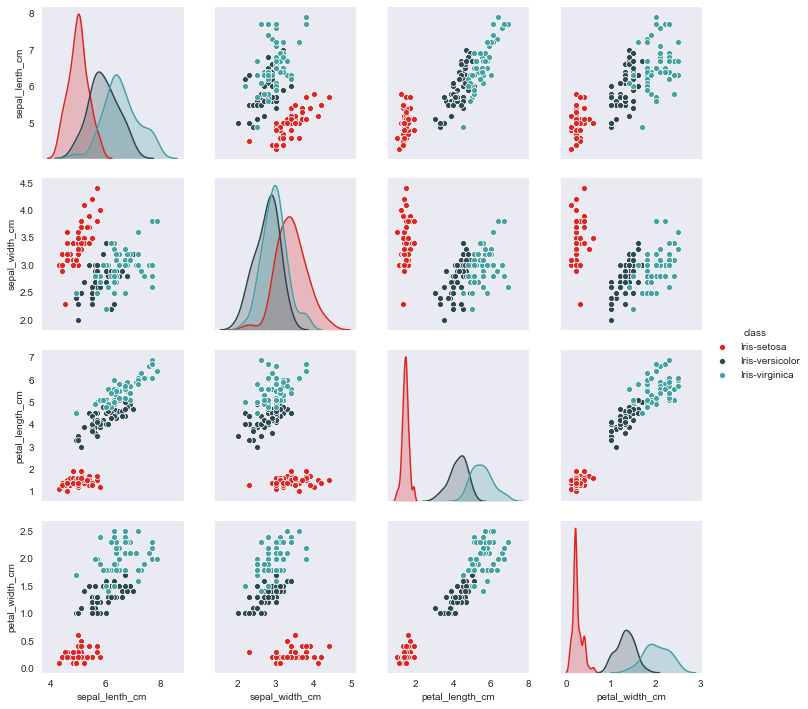

In [20]:
# 设置色板，将风格设置为 dark (背景变成灰色)，色板设置成 husl。
sns.set_style('dark')
sns.pairplot( iris_data, hue='class',
                          palette=color );

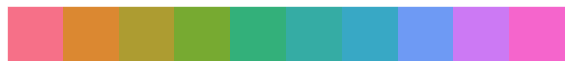

In [21]:
#husl 其实就是一个色彩系统，取 10 个样本颜色展示如下：

sns.palplot( sns.color_palette('husl',10) );

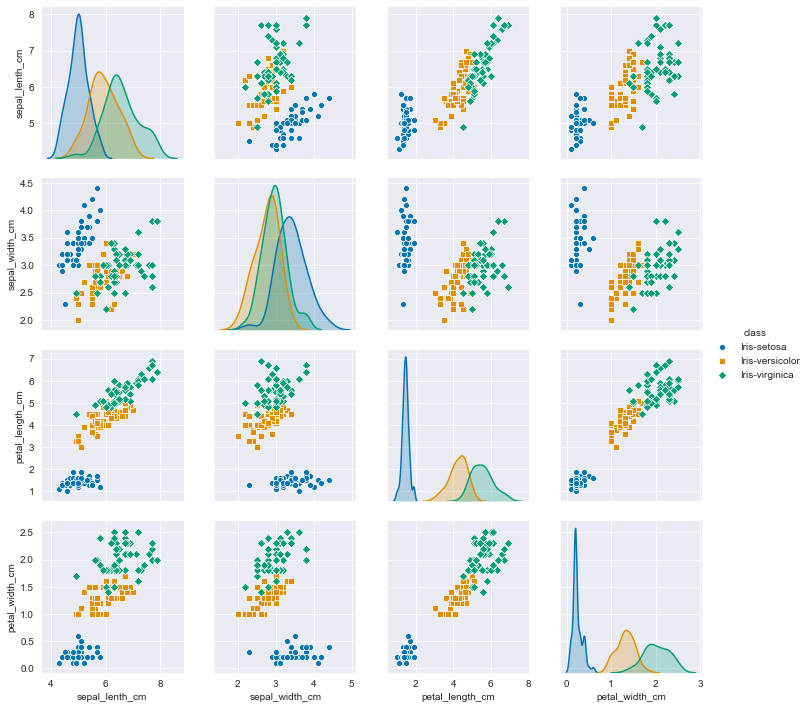

In [22]:
#将风格设置为 darkgrid (背景变成带网格的灰色)，色板设置成 colorblind 为色盲用户着想，甚至将不同类用圆形 (o)、正方形 (s) 和方块 (D) 来标记。
sns.set_style('darkgrid')
sns.set_palette('colorblind')
sns.pairplot( iris_data, hue='class',
                         markers=['o','s','D'] );

In [28]:
iris_data.columns
# data.rename(columns={"a":"c", "b":"d"}, replace=True)#在原表上修改
iris_data.rename(columns={'sepal_lenth_cm':'sepal_length_cm'},inplace=True)
iris_data.columns

Index(['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm',
       'petal_width_cm', 'class'],
      dtype='object')

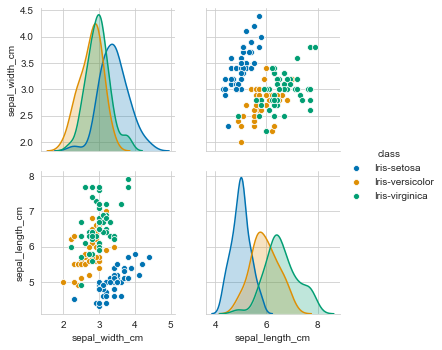

In [31]:
## 1.6 子集图
#如果我们不想展示所有变量之间的关系图，我们可以选择子集图。
#将风格设置为 whitegrid (背景变成带网格的白色)，并将横轴和纵轴赋予相同的子集变量 (都是 vars)。
# 发现 加上 hue参数会变成核密度图
sns.set_style('whitegrid')
sns.pairplot( iris_data,
               vars=['sepal_width_cm',
                     'sepal_length_cm'],
            hue='class');

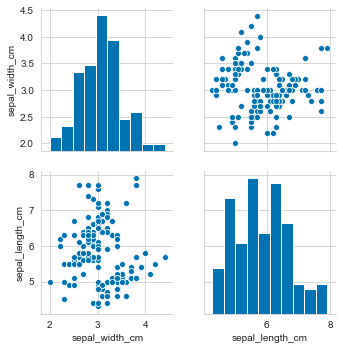

In [32]:
sns.set_style('whitegrid')
sns.pairplot( iris_data,
               vars=['sepal_width_cm',
                     'sepal_length_cm']);

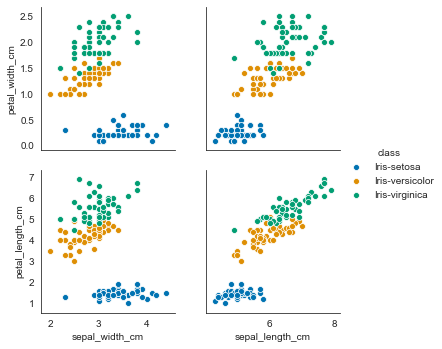

In [34]:
# 将风格设置为 white (背景变成白色)，并将横轴和纵轴赋予不同的子集变量 (x_vars 和 y_vars)。
sns.set_style('white')
sns.pairplot( iris_data,
              x_vars=['sepal_width_cm',               
                      'sepal_length_cm'],              
              y_vars=['petal_width_cm',                 
                      'petal_length_cm'],
            hue='class');

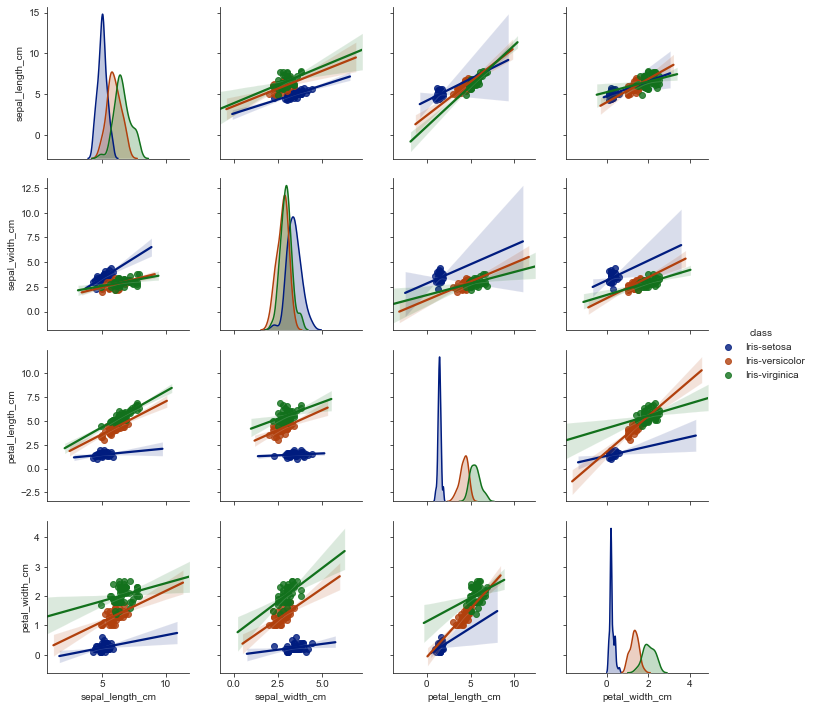

In [36]:
## 1.7 线性回归图
# pairplot() 除了画出变量之间的关系图，通过设置里面参数 kind = 'reg'，还可在非对角图上对那些散点做线性回归。
# 不加 hue 参数，纯色，单条线，分布图
sns.set_style('ticks')
sns.set_palette('dark')
sns.pairplot( iris_data, kind='reg', hue='class' );

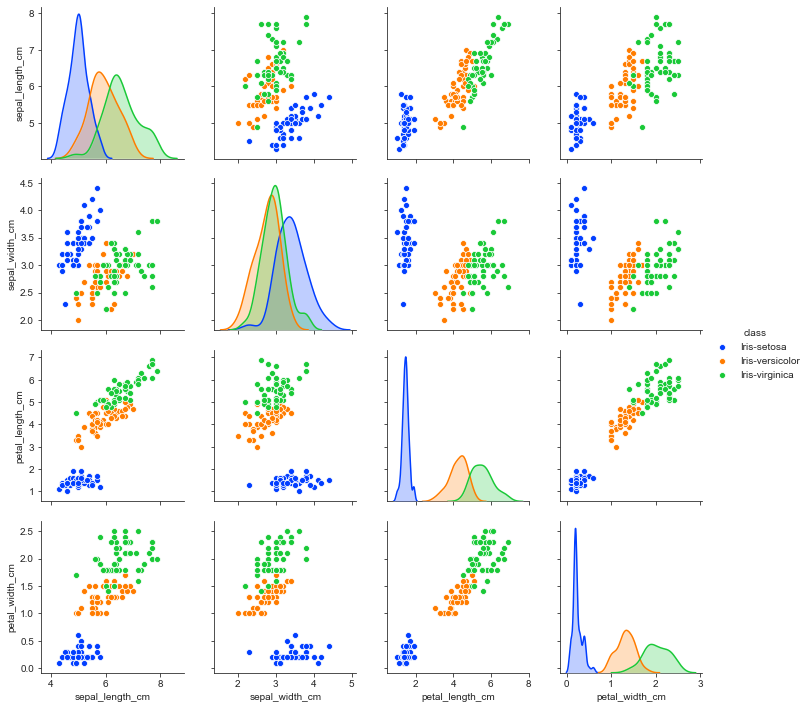

In [40]:
## 1.8
# pairplot() 除了画出变量之间的关系图，通过设置里面参数 diag_kind = 'kde'，
# 还可在对角图上对那些直方图的点做核密度估计 (KDE, kernel density estimation)，该技巧在做平滑数据时用到。

sns.set_palette('bright')
sns.pairplot( iris_data, diag_kind='kde' ,hue='class');

In [61]:
##

titanic = pd.read_csv(r'D:\ProgramData\GitHubProject\DataSets\titanic.csv')
# t2=sns.load_dataset('D:\ProgramData\GitHubProject\DataSets\titanic.csv')
# 用sns.load_dataset 没有成功，先不管了
print(f'{titanic.describe()} \n {titanic.head()}')


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200   
    PassengerId  Survived  Pclass  \
0            1         0       3   
1      

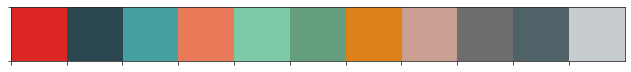

In [58]:
sns.set_palette( color )
sns.palplot( sns.color_palette(color,11) )

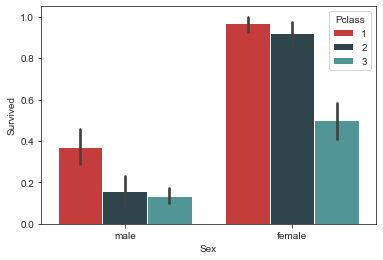

In [62]:
sns.barplot( x='Sex',
             y='Survived',        
             hue='Pclass',             
             data=titanic );

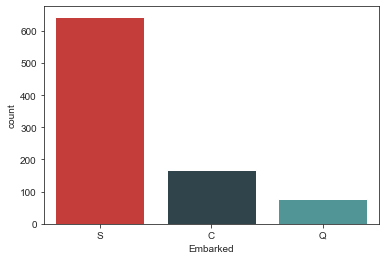

In [63]:
# 计数图
# 统计每层客舱 (x='deck') 里的人数。

sns.countplot( x='Embarked',
               data=titanic )

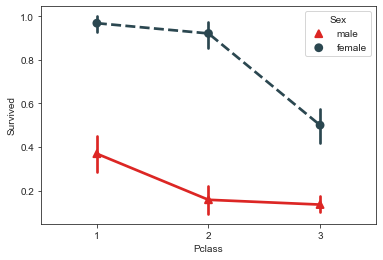

In [67]:
# 点图
# 统计每等舱 (x=‘class’) 不同性别 (hue='sex‘) 的生还率 (y='survived')。用颜色区分性别。

sns.pointplot( x='Pclass',
               y='Survived',               
               hue='Sex',               
               data=titanic,               
               markers=['^','o'],               
               linestyles=['-','--'] )

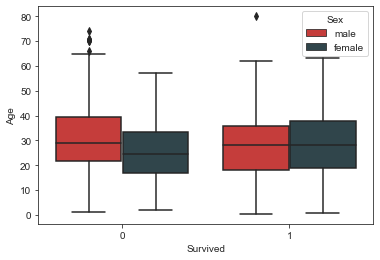

In [70]:
# 箱形图
# 统计在生还和死亡 (x='alive') 成年和未成年男性 (hue='adult_male') 的年龄分布 (y='age')。用颜色区分是否成年。

sns.boxplot( x='Survived',
             y='Age',             
             hue='Sex',             
             data=titanic )

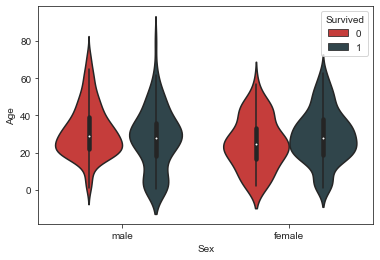

In [75]:
# 小提琴图
# 统计在男性和女性 (x='sex') 两类里生还和死亡 (hue='survived') 的年龄分布 (y='age')。用颜色区分生还率。
sns.violinplot(x='Sex',y='Age',
               hue='Survived',
               data=titanic,
               alpha=0.2
              );

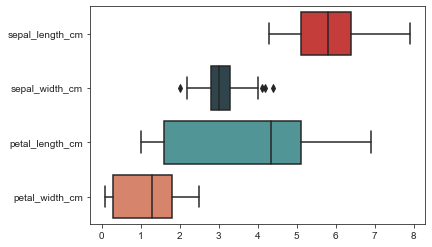

In [80]:
# 箱形水平图

# 画出萼片长度，萼片宽度，花瓣长度和花瓣宽度的箱形图 (横向)。上节也可以用这个图来找异常值。

sns.boxplot( data=iris_data,
             orient='h' ,
#            hue='class'
           );

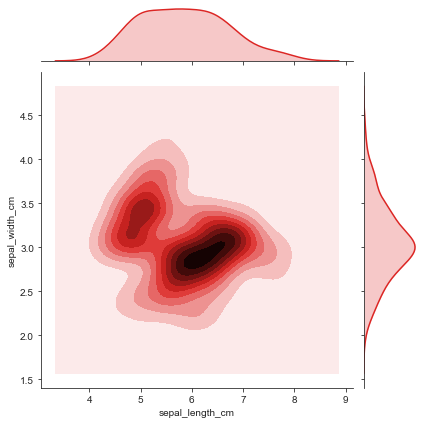

In [81]:
# 双变量分布图

# 设置 kind =‘kde’ 用双变量分布图画出萼片长度和萼片宽度的一维分布。

sns.jointplot( 'sepal_length_cm', 'sepal_width_cm',
                data=iris_data,                
                kind='kde');

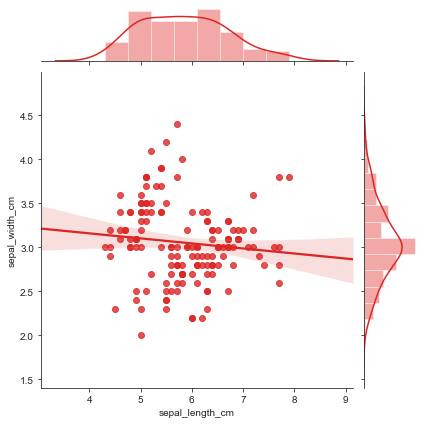

In [86]:
# 设置 kind =‘kde’ 用双变量分布图画出萼片长度和萼片宽度的线性关系。这时的分布用直方图表示

sns.jointplot( 'sepal_length_cm', 'sepal_width_cm',
                data=iris_data, 
              hue='class',
              kind='reg')

In [88]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])
    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value

def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Sample name')


In [185]:
df

,position,step,walk
0,0,0,0
1,1,1,0
2,1,2,0
3,1,3,0
4,0,4,0
...,...,...,...
95,0,0,19
96,-1,1,19
97,0,2,19
98,1,3,19


parts is {'bodies': [<matplotlib.collections.PolyCollection object at 0x00000224D4A23B88>, <matplotlib.collections.PolyCollection object at 0x00000224D4A23988>, <matplotlib.collections.PolyCollection object at 0x00000224D4A26E48>, <matplotlib.collections.PolyCollection object at 0x00000224D4A29E08>]}

----quartile1, medians, quartile3 are ----
(array([-0.6626138 , -1.32421006, -1.33282218, -3.03203139]), array([-0.00051949,  0.01508553,  0.29930292, -0.15551055]), array([0.71709805, 1.30451429, 2.19869123, 3.05844213]))


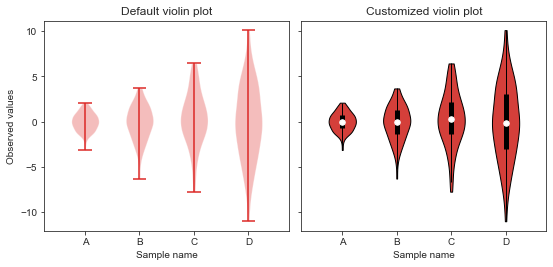

In [144]:
"""
This example demonstrates how to fully customize violin plots.
"""
# create test data
np.random.seed(19680801)
data = [sorted(np.random.normal(0, std, 100)) for std in range(1, 5)]

# 如何实现先 plt.subplots, 然后一个一个用 sns?
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey=True)
ax1.set_title('Default violin plot')
ax1.set_ylabel('Observed values')
# sns.violinplot(data,hue=data.columns)
ax1.violinplot(data)
ax2.set_title('Customized violin plot')
parts = ax2.violinplot(
        data, showmeans=False, showmedians=False,
        showextrema=False)
print(f'parts is {parts}')
for pc in parts['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(1)
quartile1, medians, quartile3 = np.percentile(data, [25, 50, 75], axis=1)
print(f'\n----quartile1, medians, quartile3 are ----\n{quartile1, medians, quartile3}')

whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(data, quartile1, quartile3)])
whiskersMin, whiskersMax = whiskers[:, 0], whiskers[:, 1]
inds = np.arange(1, len(medians) + 1)
ax2.scatter(inds, medians, marker='o', color='white', s=30, zorder=3);
ax2.vlines(inds, quartile1, quartile3, color='k', linestyle='-', lw=5)
ax2.vlines(inds, whiskersMin, whiskersMax, color='k', linestyle='-', lw=1)
# set style for the axes
labels = ['A', 'B', 'C', 'D']
for ax in [ax1, ax2]:
    set_axis_style(ax, labels)
plt.subplots_adjust(bottom=0.15, wspace=0.05)
plt.show()

data.type is <class 'pandas.core.frame.DataFrame'>


(array([0.01916722, 0.01916722, 0.03833444, 0.2875083 , 0.24917386,
        0.34500996, 0.34500996, 0.34500996, 0.15333776, 0.11500332]),
 array([-3.12183853, -2.60011446, -2.0783904 , -1.55666633, -1.03494227,
        -0.5132182 ,  0.00850587,  0.53022993,  1.051954  ,  1.57367806,
         2.09540213]),
 <a list of 10 Patch objects>)

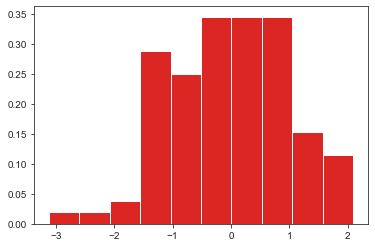

In [159]:

print(f'data.type is {type(data)}')
data=pd.DataFrame(data)
data.shape
plt.hist(data.loc[0,:],density=True,
#          cumulative=True,
        )

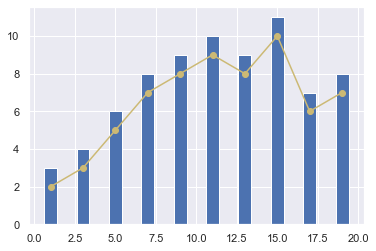

In [188]:

import matplotlib.pyplot as plt
import seaborn as sns
 
x = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
y_bar = [3, 4, 6, 8, 9, 10, 9, 11, 7, 8]
y_line = [2, 3, 5, 7, 8, 9, 8, 10, 6, 7]
 
sns.set()
 
plt.bar(x, y_bar)
plt.plot(x, y_line, '-o', color='y')
 


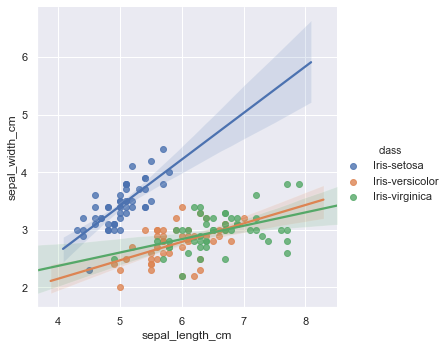

In [190]:
# sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
# context='' 参数控制着默认的画幅大小，分别有 {paper, notebook, talk, poster} 四个值。其中，poster > talk > notebook > paper。
# style='' 参数控制默认样式，分别有 {darkgrid, whitegrid, dark, white, ticks}，你可以自行更改查看它们之间的不同。
# palette='' 参数为预设的调色板。分别有 {deep, muted, bright, pastel, dark, colorblind} 等，你可以自行更改查看它们之间的不同。
# 剩下的 font='' 用于设置字体，font_scale= 设置字体大小，color_codes= 不使用调色板而采用先前的 'r' 等色彩缩写
sns.lmplot(x='sepal_length_cm', y='sepal_width_cm', hue='class', data=iris_data)


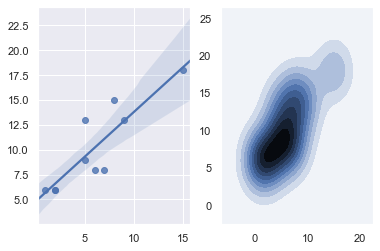

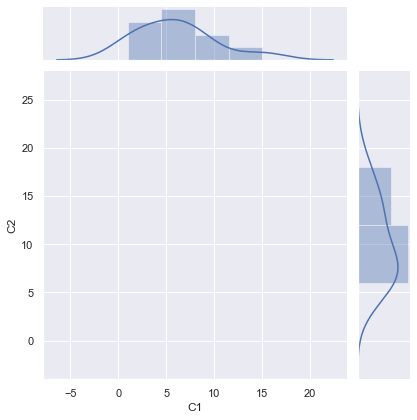

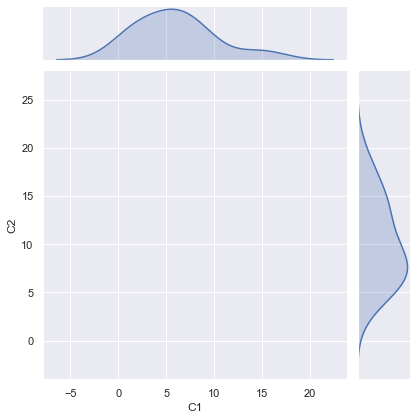

In [195]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame({'C1': {'a': 1,'b': 15,'c': 9,'d': 7,'e': 2,'f': 2,'g': 6,'h': 5,'k': 5,'l': 8},
          'C2': {'a': 6,'b': 18,'c': 13,'d': 8,'e': 6,'f': 6,'g': 8,'h': 9,'k': 13,'l': 15}})

fig = plt.figure();   
ax1 = fig.add_subplot(121);  
ax2 = fig.add_subplot(122);

sns.jointplot("C1", "C2", data=df, kind='reg', ax=ax1)
sns.jointplot("C1", "C2", data=df, kind='kde', ax=ax2)


In [192]:
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
